# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
#________________starer code_____________________________________#
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #changed to 15 from 1500 for testing
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #changed to 15 from 1500 for testing
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#_________________________end starter code______________________________________#


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up api/ create URL
import json

#target each citi in list "cities" found above
url = "http://api.openweathermap.org/data/2.5/weather?"

#build query url and exception
record_number = 0
count = 1
batch = 1

#define lists to capture from Open Weather Site
city_name = []
city_lat = []
city_long = []
temp = []
humidity = []
country = []
cloudiness = []
windspeed = []
date = []

#loop to create list of found data and grab info from api for dataframe
for i, x  in enumerate(cities):
    #set groups of 50
    if count <= 50:
        count +=1        
    else:
        batch += 1 #set of first 50
        count = 0       
    record_number += 1
    try:
        query_url = (url + "appid=" + weather_api_key + "&q=" + x)
        print(f'Processing Record {record_number} of set {batch} for City: {x}')
        #temp was provided in Kelvin - &units imperial allows us to view it in farenheit 
        cities_response = requests.get(query_url + "&units=imperial").json()
        
        #store data to lists
        city_name.append(cities_response['name'])
        city_lat.append(cities_response['coord']['lat'])
        city_long.append(cities_response['coord']['lon'])
        cloudiness.append(cities_response['clouds']['all'])
        temp.append(cities_response['main']['temp'])
        humidity.append(cities_response['main']['humidity']) 
        country.append(cities_response['sys']['country'])
        windspeed.append(cities_response['wind']['speed'])
        date.append(cities_response['dt'])
    except KeyError:
        print(f'No information found for city: {x}') 

Processing Record 1 of set 1 for City: severo-kurilsk
Processing Record 2 of set 1 for City: lavrentiya
Processing Record 3 of set 1 for City: san patricio
Processing Record 4 of set 1 for City: barrow
Processing Record 5 of set 1 for City: muisne
Processing Record 6 of set 1 for City: tecoanapa
Processing Record 7 of set 1 for City: jamestown
Processing Record 8 of set 1 for City: new norfolk
Processing Record 9 of set 1 for City: butaritari
Processing Record 10 of set 1 for City: punta arenas
Processing Record 11 of set 1 for City: mataura
Processing Record 12 of set 1 for City: chuy
Processing Record 13 of set 1 for City: cape town
Processing Record 14 of set 1 for City: tsihombe
No information found for city: tsihombe
Processing Record 15 of set 1 for City: port elizabeth
Processing Record 16 of set 1 for City: ponta do sol
Processing Record 17 of set 1 for City: norman wells
Processing Record 18 of set 1 for City: ulladulla
Processing Record 19 of set 1 for City: tabas
Processing 

Processing Record 157 of set 4 for City: malatya
Processing Record 158 of set 4 for City: padang
Processing Record 159 of set 4 for City: hofn
Processing Record 160 of set 4 for City: yunjinghong
No information found for city: yunjinghong
Processing Record 161 of set 4 for City: sao geraldo do araguaia
Processing Record 162 of set 4 for City: urdzhar
No information found for city: urdzhar
Processing Record 163 of set 4 for City: atar
Processing Record 164 of set 4 for City: dikson
Processing Record 165 of set 4 for City: high level
Processing Record 166 of set 4 for City: lata
Processing Record 167 of set 4 for City: katsuura
Processing Record 168 of set 4 for City: hervey bay
Processing Record 169 of set 4 for City: lorengau
Processing Record 170 of set 4 for City: saint-philippe
Processing Record 171 of set 4 for City: kununurra
Processing Record 172 of set 4 for City: bac lieu
Processing Record 173 of set 4 for City: vila franca do campo
Processing Record 174 of set 4 for City: hain

Processing Record 312 of set 7 for City: taga
Processing Record 313 of set 7 for City: namatanai
Processing Record 314 of set 7 for City: longyearbyen
Processing Record 315 of set 7 for City: camacha
Processing Record 316 of set 7 for City: chuka
Processing Record 317 of set 7 for City: antsohihy
Processing Record 318 of set 7 for City: nigrita
Processing Record 319 of set 7 for City: saldanha
Processing Record 320 of set 7 for City: nguiu
No information found for city: nguiu
Processing Record 321 of set 7 for City: burica
No information found for city: burica
Processing Record 322 of set 7 for City: versalles
Processing Record 323 of set 7 for City: kavaratti
Processing Record 324 of set 7 for City: coos bay
Processing Record 325 of set 7 for City: nome
Processing Record 326 of set 7 for City: ratnagiri
Processing Record 327 of set 7 for City: chake chake
Processing Record 328 of set 7 for City: biskamzha
Processing Record 329 of set 7 for City: karratha
Processing Record 330 of set 7

Processing Record 470 of set 10 for City: abu zabad
Processing Record 471 of set 10 for City: lubben
Processing Record 472 of set 10 for City: coquimbo
Processing Record 473 of set 10 for City: kiruna
Processing Record 474 of set 10 for City: forbes
Processing Record 475 of set 10 for City: pangoa
Processing Record 476 of set 10 for City: gravelbourg
Processing Record 477 of set 10 for City: qandala
Processing Record 478 of set 10 for City: constitucion
Processing Record 479 of set 10 for City: la palma
Processing Record 480 of set 10 for City: waldorf
Processing Record 481 of set 10 for City: sutamarchan
Processing Record 482 of set 10 for City: makat
Processing Record 483 of set 10 for City: talpa
Processing Record 484 of set 10 for City: goderich
Processing Record 485 of set 10 for City: marrakesh
Processing Record 486 of set 10 for City: kaeo
Processing Record 487 of set 10 for City: zunyi
Processing Record 488 of set 10 for City: mandya
Processing Record 489 of set 10 for City: ge

No information found for city: warqla
Processing Record 620 of set 12 for City: la rioja
Processing Record 621 of set 12 for City: alofi
Processing Record 622 of set 12 for City: una
Processing Record 623 of set 13 for City: falam
Processing Record 624 of set 13 for City: dabola
Processing Record 625 of set 13 for City: turukhansk
Processing Record 626 of set 13 for City: sandpoint
Processing Record 627 of set 13 for City: sancti spiritus
Processing Record 628 of set 13 for City: ambilobe
Processing Record 629 of set 13 for City: mogadishu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {"City Name" : city_name, "Country Name": country, "Latitude":city_lat, "Longitude":city_long, "Temperature": temp, "Humidity": humidity, "Cloudiness":cloudiness, "Windspeed":windspeed, "Date":date }
cities_df = pd.DataFrame(cities_dict)
cities_df['Date']=pd.to_datetime(cities_df['Date'], unit='s')
cities_df.to_csv("../output_data/Citiesweather.csv", index = False, header = True)

In [5]:
cities_df

,City Name,Country Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,Severo-Kuril'sk,RU,50.68,156.12,51.37,83,100,5.08,2020-07-24 02:45:54
1,Lavrentiya,RU,65.58,-171.00,56.17,61,100,8.59,2020-07-24 02:49:45
2,San Patricio,MX,19.22,-104.70,82.40,74,75,4.83,2020-07-24 02:41:51
3,Barrow,US,71.29,-156.79,39.20,93,90,8.05,2020-07-24 02:45:25
4,Muisne,EC,0.60,-80.03,73.42,85,99,8.39,2020-07-24 02:49:45
...,...,...,...,...,...,...,...,...,...
575,Turukhansk,RU,65.82,87.98,56.21,70,100,7.96,2020-07-24 02:50:52
576,Sandpoint,US,48.28,-116.55,72.00,46,1,3.96,2020-07-24 02:50:11
577,Sancti Spíritus,CU,21.93,-79.44,74.57,91,100,3.44,2020-07-24 02:50:53
578,Ambilobe,MG,-13.20,49.05,68.68,61,78,1.61,2020-07-24 02:50:08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check for cities with high humidity
if len(cities_df.loc[cities_df['Humidity'] > 100]):
    #keep those with humidity less than 100
    high_humidity_df = cities_df.loc[cities_df['Humidity'] > 100]
    clean_cities_df = cities_df.loc[cities_df['Humidity'] <= 100]
    #Get the indices of cities that have humidity over 100%.
    high_humidity_label = cities_df[cities_df['Humidity']>100].index.tolist()
    print(high_humidity_label)
    print(high_humidity_df)
else:
    clean_cities_df = cities_df

In [7]:
    ##__________________review with tutor_________________________________-##


    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    #condition= cities_df.loc[cities_df['Humidity'] < 100]
    #clean_cities_df = cities_df.where(cond=cities_df.loc[cities_df['Humidity'] < 100],inplace=False)
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


    #print(clean_city_data_df)
    #print(clean_cities_df)

In [8]:
    # Extract relevant fields from the data frame
    # Export the City_Data into a csv
    clean_cities_df.to_csv("../output_data/clean_cities_data.csv", index = False, header = True)
    clean_cities_df['just_date'] = clean_cities_df['Date'].dt.date
    clean_cities_df

,City Name,Country Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date,just_date
0,Severo-Kuril'sk,RU,50.68,156.12,51.37,83,100,5.08,2020-07-24 02:45:54,2020-07-24
1,Lavrentiya,RU,65.58,-171.00,56.17,61,100,8.59,2020-07-24 02:49:45,2020-07-24
2,San Patricio,MX,19.22,-104.70,82.40,74,75,4.83,2020-07-24 02:41:51,2020-07-24
3,Barrow,US,71.29,-156.79,39.20,93,90,8.05,2020-07-24 02:45:25,2020-07-24
4,Muisne,EC,0.60,-80.03,73.42,85,99,8.39,2020-07-24 02:49:45,2020-07-24
...,...,...,...,...,...,...,...,...,...,...
575,Turukhansk,RU,65.82,87.98,56.21,70,100,7.96,2020-07-24 02:50:52,2020-07-24
576,Sandpoint,US,48.28,-116.55,72.00,46,1,3.96,2020-07-24 02:50:11,2020-07-24
577,Sancti Spíritus,CU,21.93,-79.44,74.57,91,100,3.44,2020-07-24 02:50:53,2020-07-24
578,Ambilobe,MG,-13.20,49.05,68.68,61,78,1.61,2020-07-24 02:50:08,2020-07-24


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

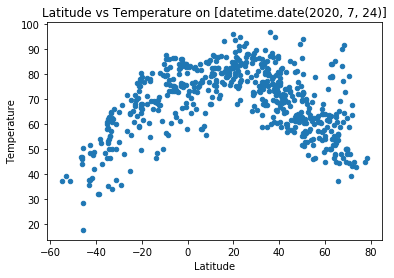

In [9]:
clean_cities_df.plot.scatter("Latitude", "Temperature")
plt.title(f'Latitude vs Temperature on {clean_cities_df["just_date"].unique()}')
plt.savefig("../output_data/LatvsTemp.png")
plt.show()

The scatter plot clearly shows areas close to the equator have higher temperatures. 

## Latitude vs. Humidity Plot

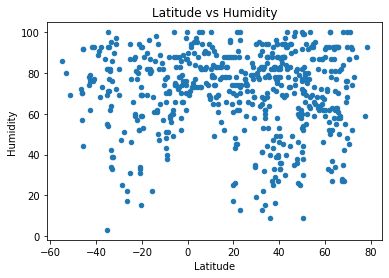

In [10]:
clean_cities_df.plot.scatter("Latitude", "Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data/LatvsHumid.png")
plt.show()

This scatter plot shows latitude does not have much of an impact on a locations humidty. 

## Latitude vs. Cloudiness Plot

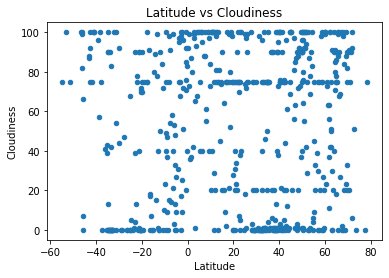

In [11]:
clean_cities_df.plot.scatter("Latitude", "Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.savefig("../output_data/LatvsClouds.png")
plt.show()

This scatter plot shows latitude does not appear to have an impact on cloudiness of an area. 

## Latitude vs. Wind Speed Plot

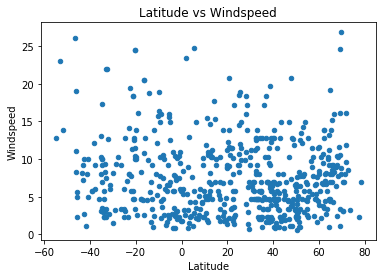

In [12]:
clean_cities_df.plot.scatter("Latitude", "Windspeed")
plt.title("Latitude vs Windspeed")
plt.savefig("../output_data/LatvsWS.png")
plt.show()

This scatter plot illustrates that the windspeed is more or less consisten across all latitudes - with some peaks likely influcenced by current weather at the time this was reviewed. 

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearregression(x,y,xlabel, ylabel, annotate): #will set annotate after reviewing the plot for optimal slope equation placement
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,annotate,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} "vs" {ylabel}')   


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_cities_df.loc[clean_cities_df['Latitude']>=0]
northern_hemisphere_df.dropna(how = 'all', axis =1)
southern_hemisphere_df = clean_cities_df.loc[clean_cities_df['Latitude']<0]
southern_hemisphere_df.dropna(how = 'all', axis =1)

,City Name,Country Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date,just_date
7,New Norfolk,AU,-42.78,147.06,48.54,79,100,2.68,2020-07-24 02:45:24,2020-07-24
9,Punta Arenas,CL,-53.15,-70.92,39.09,80,100,23.04,2020-07-24 02:45:19,2020-07-24
10,Mataura,NZ,-46.19,168.86,44.22,70,99,8.34,2020-07-24 02:45:19,2020-07-24
11,Chui,UY,-33.70,-53.46,64.63,95,83,5.79,2020-07-24 02:45:46,2020-07-24
12,Cape Town,ZA,-33.93,18.42,55.40,62,0,2.24,2020-07-24 02:41:14,2020-07-24
...,...,...,...,...,...,...,...,...,...,...
560,Quelimane,MZ,-17.88,36.89,68.00,82,75,4.70,2020-07-24 02:50:50,2020-07-24
561,Vilhena,BR,-12.74,-60.15,70.77,47,0,4.65,2020-07-24 02:46:07,2020-07-24
569,Saurimo,AO,-9.66,20.39,56.34,43,0,6.49,2020-07-24 02:50:51,2020-07-24
571,Alofi,NU,-19.06,-169.92,77.00,88,75,16.11,2020-07-24 02:47:07,2020-07-24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

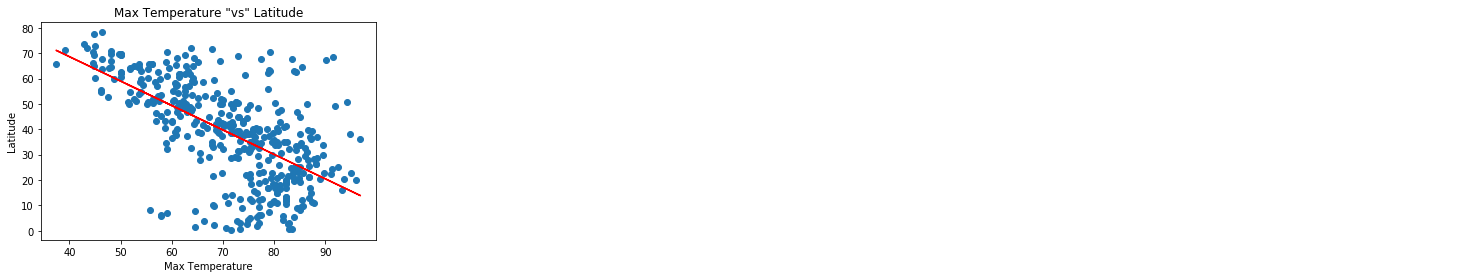

In [15]:
#call function
linearregression(northern_hemisphere_df['Temperature'],northern_hemisphere_df['Latitude'], "Max Temperature", "Latitude", (280,20))
#sav fig
plt.savefig("../output_data/NorthMaxTempvsLat.png")
plt.show()

The above regression reiterates the strong correlation between the latitude (proximity to the equator) and max temperature. So the farther north, the colder the max temps. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

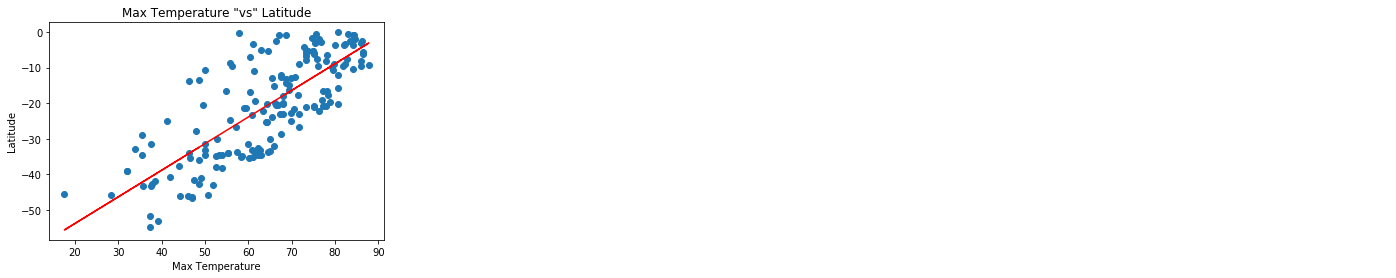

In [16]:
#call function
linearregression(southern_hemisphere_df['Temperature'],southern_hemisphere_df['Latitude'], "Max Temperature", "Latitude", (290,-50))
#save figure
plt.savefig("../output_data/SouthMaxTempvsLat.png")
plt.show()

The above regression shows a fairly strong correlation between proximity to the equator and max temp. In this case the farther south the colder the max temp. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

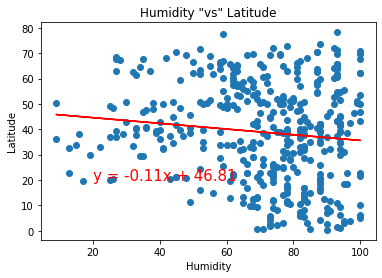

In [17]:
#Call function
linearregression(northern_hemisphere_df['Humidity'],northern_hemisphere_df['Latitude'], "Humidity", "Latitude", (20,20))
#save figure
plt.savefig("../output_data/NorthHumidvsLat.png")
plt.show()

Regression of the Northern Hemisphere reiterates that there is not much or a correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

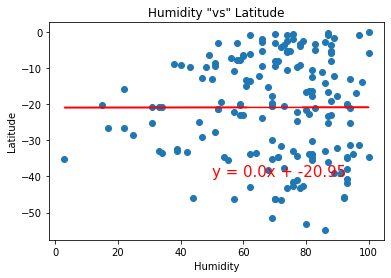

In [18]:
#call function
linearregression(southern_hemisphere_df['Humidity'],southern_hemisphere_df['Latitude'], "Humidity", "Latitude", (50, -40))
#save figure
plt.savefig("../output_data/SouthHumidvsLat.png")
plt.show()

Regression of the Southern Hemisphere reiterates that there is not much of a correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

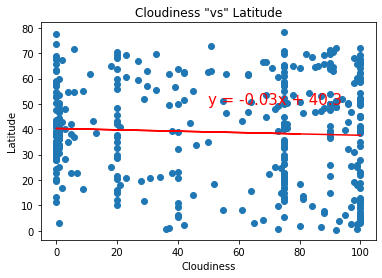

In [19]:
#call function
linearregression(northern_hemisphere_df['Cloudiness'],northern_hemisphere_df['Latitude'], "Cloudiness", "Latitude", (50,50))
#Sav fig
plt.savefig("../output_data/NorthCloudvsLat.png")
plt.show()

Regression of the Northern Hemisphere reiterates that there is not much of a correlation between cloudiness and latitude. This makes sense as I would anticipate seeing more clouds where there is more humidity and there was no correlation on that aspect either. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

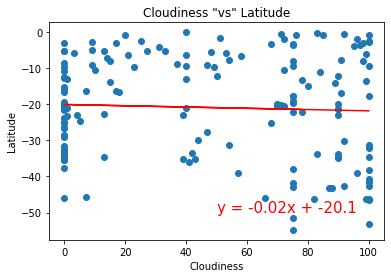

In [20]:
#call function
linearregression(southern_hemisphere_df['Cloudiness'],southern_hemisphere_df['Latitude'], "Cloudiness", "Latitude", (50,-50))
#sav fig
plt.savefig("../output_data/SouthCloudvsLat.png")
plt.show()

Regression of the Southern Hemisphere reiterates that there is not much of a correlation between cloudiness and latitude. This makes sense as I would anticipate seeing more clouds where there is more humidity and there was no correlation on that aspect either. In this graph you do see a bit more of a "lack of clouds" the clsoe to the south pole however - perhaps in conjuction with the very low humidity there. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

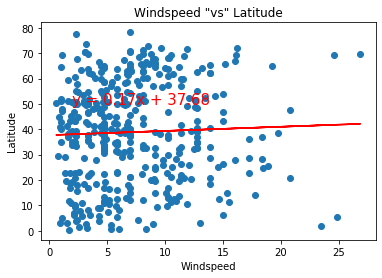

In [21]:
#call function
linearregression(northern_hemisphere_df['Windspeed'],northern_hemisphere_df['Latitude'],"Windspeed", "Latitude", (2,50) )
#sav fig
plt.savefig("../output_data/NorthWSvsLat.png")
plt.show()

As seen on the previous scatter plot above, this regression shows that windspeed is more of a general constant not impacted by latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

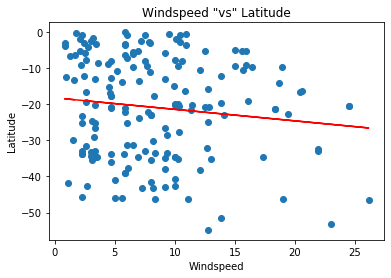

In [22]:
#Call function
linearregression(southern_hemisphere_df['Windspeed'],southern_hemisphere_df['Latitude'], "Windspeed", "Latitude", (6, -60))
#sav fig
plt.savefig("../output_data/SouthWSvsLat.png")
plt.show()

As seen on the previous scatter plot above, this regression shows that windspeed is more of a general constant not impacted by latitude. 